In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle
from scipy.constants import c as speed_of_light
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from tqdm import tqdm

In [5]:
def total_flux(wl, flux_nu):
    """
    Calculate the total flux over the wavelengths and returns the flux in erg cm^-2 s^-1
    """
    flux_lambda = (speed_of_light * 100 / ((wl * 1e-4) ** 2)) * flux_nu * 1e-23
    tot_flux = np.trapezoid(flux_lambda, (wl * 1e-4))
    return tot_flux

def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x - mu)**2 / (2 * sigma**2))

def multi_gaussian(x, *params):
    """Fits multiple Gaussians. params = [amp1, cen1, wid1, amp2, cen2, wid2, ...]"""
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        amp, cen, wid = params[i:i+3]
        y += gaussian(x, amp, cen, wid)
    return y

In [6]:
with open('FLiTsData1000.pkl', 'rb') as f:
    df = pickle.load(f)

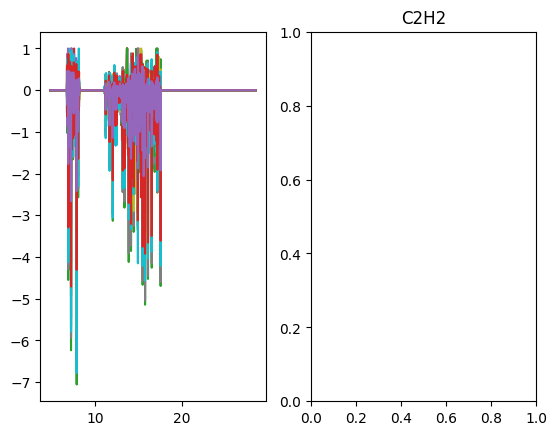

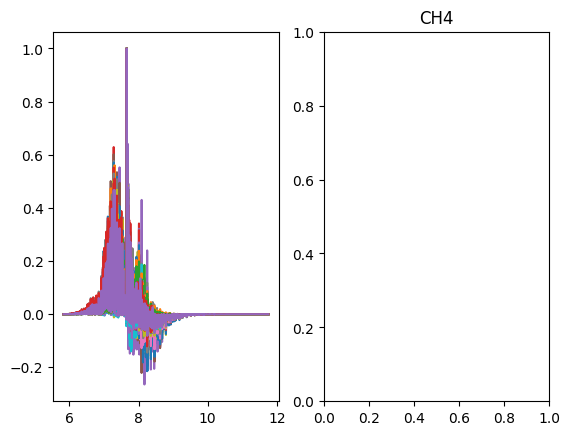

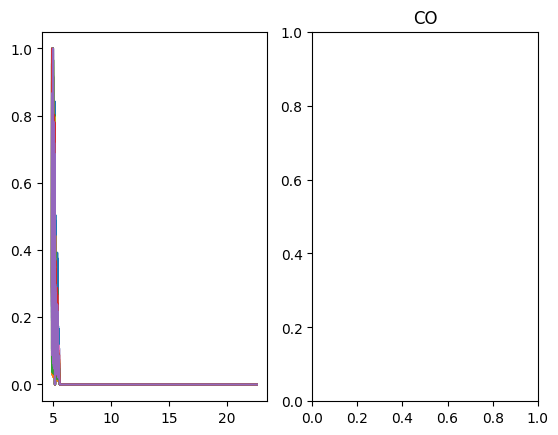

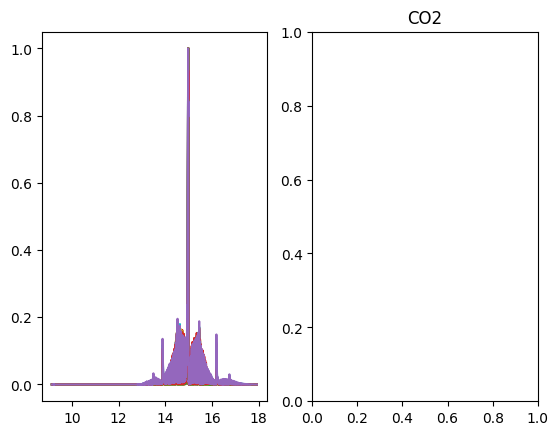

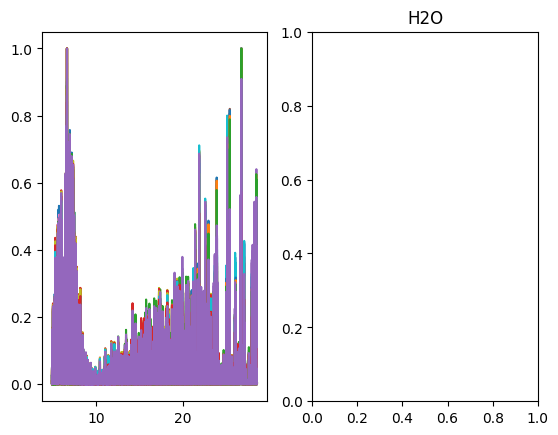

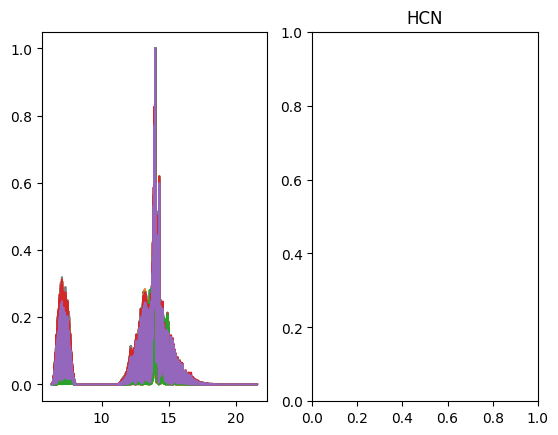

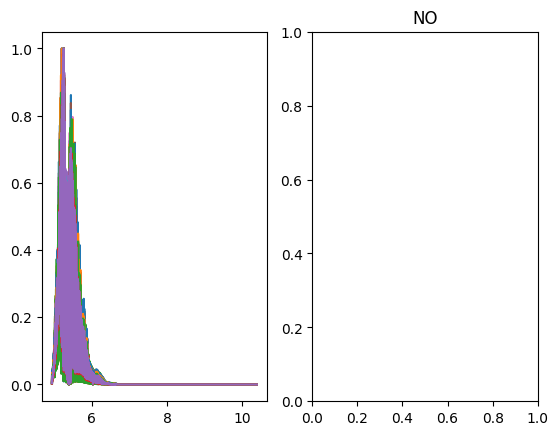

C:\Users\Niels de Klerk\AppData\Local\Temp\ipykernel_22032\1743472504.py:8: RuntimeWarning: invalid value encountered in divide
  axes[0].plot(specie_wl, specie_flux/max(specie_flux))


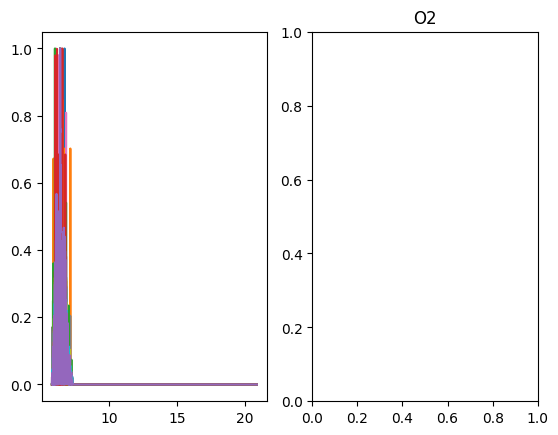

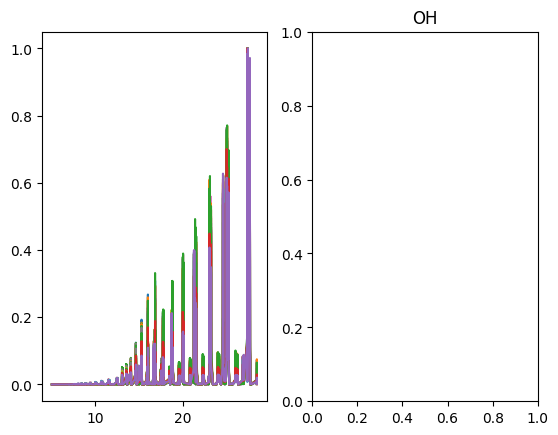

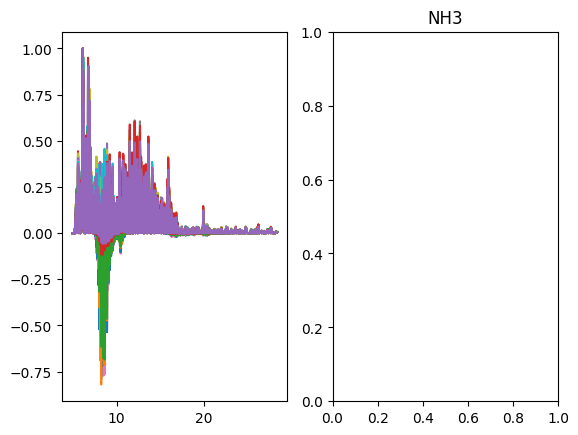

In [7]:
species = ['C2H2','CH4', 'CO', 'CO2', 'H2O', 'HCN',  'NO', 'O2', 'OH','NH3']
for specie in species:
    for i in range(25):
        model = df['Model Name'][i]
        specie_wl = df.loc[df['Model Name'] == model, f'FLiTs {specie} Wavelength'].values[0].copy()
        specie_flux = df.loc[df['Model Name'] == model, f'FLiTs {specie} Flux'].values[0].copy()
        plt.plot(specie_wl, specie_flux/max(specie_flux))
    a=1
    # plt.xlim(13,13.5)
    plt.title(specie)
    plt.show()

In [33]:
model = df['Model Name'][10]
flits_wl = df.loc[df['Model Name'] == model, f'FLiTs Wavelength'].values[0].copy()
flits_flux = df.loc[df['Model Name'] == model, f'FLiTs Flux'].values[0].copy()

new_wl = flits_wl[(flits_wl>6)&(flits_wl<6.4)]
new_flux = flits_flux[(flits_wl>6)&(flits_wl<6.4)]

peaks, _ = find_peaks(new_flux, height=0.0001)

print(len(peaks))

initial_params = []
for peak in tqdm(peaks):
    amp_guess = new_flux[peak]
    cen_guess = new_wl[peak]
    wid_guess = 0.001  # assume rough width
    initial_params += [amp_guess, cen_guess, wid_guess]

popt, _ = curve_fit(multi_gaussian, new_wl, new_flux, p0=initial_params)

13


100%|██████████| 13/13 [00:00<00:00, 214669.10it/s]


(6.00000968, 6.39998115)

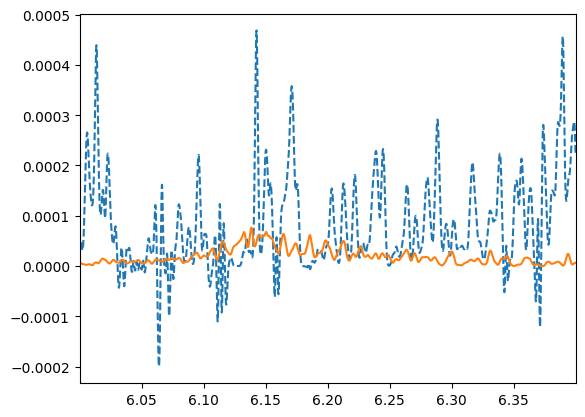

In [34]:
    plt.plot(new_wl, new_flux - multi_gaussian(new_wl, *popt), '--', label='Gaussian Fit')
    plt.plot(df.loc[df['Model Name'] == model, f'FLiTs NH3 Wavelength'].values[0].copy(), df.loc[df['Model Name'] == model, f'FLiTs NH3 Flux'].values[0].copy())
    plt.xlim(new_wl.min(), new_wl.max())